<a href="https://colab.research.google.com/github/advika31/anomaly-detection-in-network-traffic/blob/main/anomaly_detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Install necessary Python libraries for data manipulation, machine learning, and visualization
!pip install pandas numpy scikit-learn matplotlib seaborn

# Explanation:
# - `pandas`: A library for data manipulation and analysis. It provides data structures and functions needed to work with structured data seamlessly.
# - `numpy`: A library for numerical operations in Python. It is used for handling arrays and performing mathematical computations.
# - `scikit-learn`: A machine learning library that provides simple and efficient tools for data analysis and modeling.
# - `matplotlib`: A library for creating static, animated, and interactive visualizations in Python.
# - `seaborn`: A library for statistical data visualization based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.


In [13]:
# Install the Kaggle API client library
!pip install kaggle

# Explanation:
# - `kaggle`: This library provides an interface to interact with the Kaggle API. It allows you to download datasets, submit predictions, and manage Kaggle competitions programmatically.

In [14]:
# Import necessary libraries
import json
from google.colab import drive

# Open and read the Kaggle API credentials file
with open('/content/drive/My Drive/kaggle.json') as f:
    data = json.load(f)

In [15]:
# Create the .kaggle directory in the home directory if it does not already exist
!mkdir ~/.kaggle

# Copy the kaggle.json file from Google Drive to the .kaggle directory
!cp /content/drive/My\ Drive/kaggle.json ~/.kaggle/

# Change the permissions of kaggle.json to be read/write for the owner only (secure access)
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [16]:
# Download the dataset from Kaggle using the dataset identifier
!kaggle datasets download -d galaxyh/kdd-cup-1999-data


Dataset URL: https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data
License(s): unknown
kdd-cup-1999-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
import zipfile

# Open the downloaded ZIP file
with zipfile.ZipFile('kdd-cup-1999-data.zip', 'r') as zip_ref:
    # Extract all contents of the ZIP file into the 'kdd-cup-1999-data' directory
    zip_ref.extractall('kdd-cup-1999-data')


In [18]:
# 01 PREPROCESSING

import pandas as pd

# Load dataset from CSV file without a header row
df = pd.read_csv('/content/kdd-cup-1999-data/kddcup.data_10_percent_corrected', header=None)

# Assign column names to the dataframe based on the dataset's description
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'label']
df.columns = columns

# Data cleaning
# Replace invalid values ('?', 'nan', 'inf', '-inf') with NaN
df.replace(['?', 'nan', 'inf', '-inf'], pd.NA, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df)

# Save the cleaned dataframe to a CSV file
df.to_csv('/content/drive/MyDrive/all_data.csv', index=False)


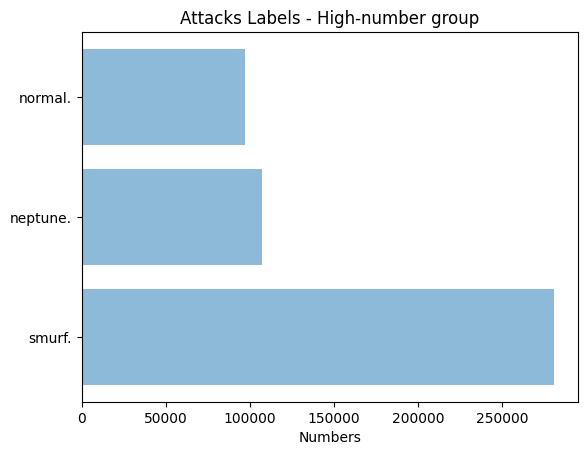

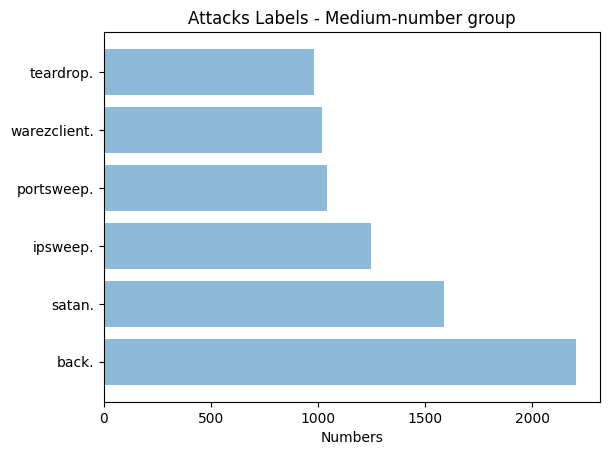

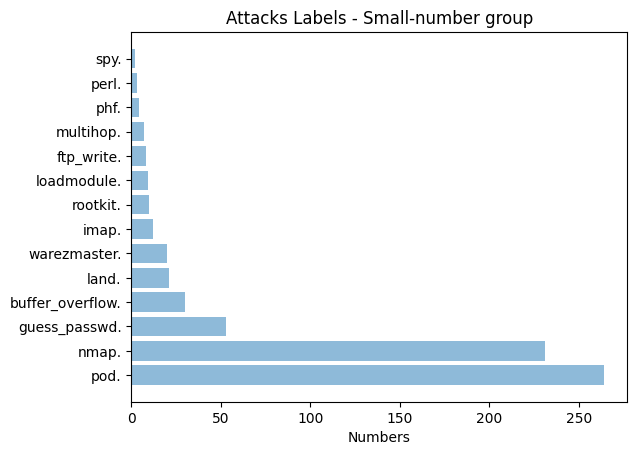

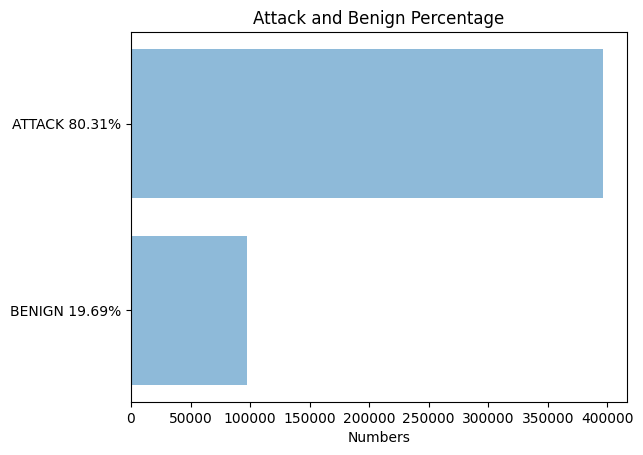

In [19]:
# 02 STATISTICS

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('kdd-cup-1999-data/kddcup.data_10_percent_corrected')

# Identify the correct label column
label_column = 'normal.'

# Count occurrences of each label
label_counts = df[label_column].value_counts()

# Separate labels based on count into small, medium, and big categories
small_labels = label_counts[label_counts < 600]       # Labels occurring less than 600 times
medium_labels = label_counts[(label_counts >= 600) & (label_counts <= 11000)]  # Labels occurring between 600 and 11000 times
big_labels = label_counts[label_counts > 11000]       # Labels occurring more than 11000 times

# Function to plot horizontal bar charts
def graph(objects, performance, x_label, y_label):
    y_pos = np.arange(len(objects))  # Position of bars on y-axis
    plt.barh(y_pos, performance, align='center', alpha=0.5)  # Create horizontal bar chart
    plt.yticks(y_pos, objects)  # Set y-tick labels to the names of the objects
    plt.xlabel(x_label)  # Label for x-axis
    plt.title(y_label)  # Title of the plot
    plt.show()  # Display the plot

# Calculate counts for benign and attack labels
benign_count = label_counts.get('normal.', 0)  # Number of benign instances
attack_count = label_counts.sum() - benign_count  # Number of attack instances

# Prepare data for plotting
labels = ["BENIGN " + str(round(benign_count / (benign_count + attack_count) * 100, 2)) + "%",
          "ATTACK " + str(round(attack_count / (benign_count + attack_count) * 100, 2)) + "%"]
values = [benign_count, attack_count]

# Plot graphs for different label categories
graph(big_labels.index, big_labels.values, "Numbers", "Attacks Labels - High-number group")
graph(medium_labels.index, medium_labels.values, "Numbers", "Attacks Labels - Medium-number group")
graph(small_labels.index, small_labels.values, "Numbers", "Attacks Labels - Small-number group")
graph(labels, values, "Numbers", "Attack and Benign Percentage")


In [20]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/all_data.csv')

# Display the first few rows to understand the structure
print(df.head())


   duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        181       5450     0               0       0    0   
1         0        239        486     0               0       0    0   
2         0        235       1337     0               0       0    0   
3         0        219       1337     0               0       0    0   
4         0        217       2032     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  label_phf.  label_pod.  \
0                  0          1                0  ...       False       False   
1                  0          1                0  ...       False       False   
2                  0          1                0  ...       False       False   
3                  0          1                0  ...       False       False   
4                  0          1                0  ...       False       False   

   label_portsweep.  label_rootkit.  label_satan.  label_smurf.  label_spy.  \
0

In [21]:
# List of attack columns
attack_columns = ['label_phf.', 'label_pod.', 'label_portsweep.', 'label_rootkit.',
                  'label_satan.', 'label_smurf.', 'label_spy.', 'label_teardrop.',
                  'label_warezclient.', 'label_warezmaster.']

# Initialize a dictionary to store counts
attack_counts = {col: df[col].sum() for col in attack_columns}

# Print attack counts
for attack, count in attack_counts.items():
    print(f"{attack}: {count} occurrences")


label_phf.: 4 occurrences
label_pod.: 264 occurrences
label_portsweep.: 1040 occurrences
label_rootkit.: 10 occurrences
label_satan.: 1589 occurrences
label_smurf.: 280790 occurrences
label_spy.: 2 occurrences
label_teardrop.: 979 occurrences
label_warezclient.: 1020 occurrences
label_warezmaster.: 20 occurrences


In [22]:
# Check unique values in all label columns
# Filter columns that contain 'label_' in their name
label_columns = df.filter(like='label_').columns

# Iterate through each label column to get and print unique values
for column in label_columns:
    unique_values = df[column].unique()  # Get unique values in the column
    print(f"Unique values in {column}: {unique_values}")  # Print unique values


Unique values in label_back.: [False  True]
Unique values in label_buffer_overflow.: [False  True]
Unique values in label_ftp_write.: [False  True]
Unique values in label_guess_passwd.: [False  True]
Unique values in label_imap.: [False  True]
Unique values in label_ipsweep.: [False  True]
Unique values in label_land.: [False  True]
Unique values in label_loadmodule.: [False  True]
Unique values in label_multihop.: [False  True]
Unique values in label_neptune.: [False  True]
Unique values in label_nmap.: [False  True]
Unique values in label_normal.: [ True False]
Unique values in label_perl.: [False  True]
Unique values in label_phf.: [False  True]
Unique values in label_pod.: [False  True]
Unique values in label_portsweep.: [False  True]
Unique values in label_rootkit.: [False  True]
Unique values in label_satan.: [False  True]
Unique values in label_smurf.: [False  True]
Unique values in label_spy.: [False  True]
Unique values in label_teardrop.: [False  True]
Unique values in label_

In [23]:
# 03 ATTACK FILTER

# Import necessary libraries
import os
import pandas as pd
import time

# Start timer to measure processing time
seconds = time.time()

# Function to create a directory if it does not already exist
def create_folder(f_name):
    if not os.path.exists(f_name):
        os.makedirs(f_name)

# Create a directory for saving attack files
create_folder("./attacks/")

print("This process may take a few minutes, depending on the performance of your computer.\n\n\n")

# Load the dataset from the specified path
df = pd.read_csv('/content/drive/MyDrive/all_data.csv')

# Column headers for features of interest
main_labels = ["duration", "src_bytes", "dst_bytes", "land", "wrong_fragment",
               "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
               "label_normal."]

# List of attack label columns
attacks = ["label_phf.", "label_pod.", "label_portsweep.", "label_rootkit.",
           "label_satan.", "label_smurf.", "label_spy.", "label_teardrop.",
           "label_warezclient.", "label_warezmaster."]

# Filter the benign samples from the dataset
benign_df = df[df['label_normal.'] == True]
print(f"Number of benign samples: {len(benign_df)}")

# Iterate over each attack type to filter and save attack-specific datasets
for attack in attacks:
    # Count the number of attack samples for the current attack type
    attack_count = len(df[df[attack] == True])

    # Calculate the number of benign samples needed (70% benign, 30% attack)
    benign_samples_needed = int((attack_count / 3) * 7)

    # Ensure there are enough benign samples available
    if len(benign_df) < benign_samples_needed:
        print(f"Warning: Not enough benign samples for {attack}. Needed: {benign_samples_needed}, Available: {len(benign_df)}")
        benign_samples_needed = len(benign_df)

    # Randomly sample the required number of benign samples
    sampled_benign = benign_df.sample(n=benign_samples_needed)

    # Filter attack samples and combine with the sampled benign data
    attack_samples = df[df[attack] == True]
    combined_samples = pd.concat([attack_samples, sampled_benign])

    # Save the combined samples to a CSV file in the 'attacks' directory
    combined_samples.to_csv(f"./attacks/{attack}_filtered.csv", index=False)

    print(f"{attack} file completed with {len(combined_samples)} samples.\n\n")

# Print completion message and the time taken for the operation
print("Mission accomplished!")
print("Operation time: =", time.time() - seconds, "seconds")


This process may take a few minutes, depending on the performance of your computer.



Number of benign samples: 97278
label_phf. file completed with 13 samples.


label_pod. file completed with 880 samples.


label_portsweep. file completed with 3466 samples.


label_rootkit. file completed with 33 samples.


label_satan. file completed with 5296 samples.


label_smurf. file completed with 378068 samples.


label_spy. file completed with 6 samples.


label_teardrop. file completed with 3263 samples.


label_warezclient. file completed with 3400 samples.


label_warezmaster. file completed with 66 samples.


Mission accomplished!
Operation time: = 28.70981764793396 seconds


Columns in label_phf._filtered.csv: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u'

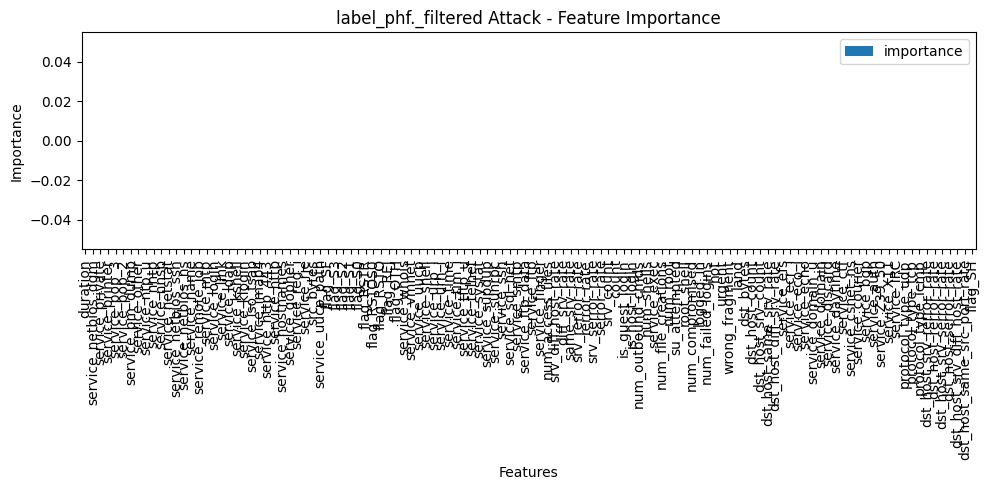

-----------------------------------------------------------------------------------------------




Columns in label_spy._filtered.csv: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_

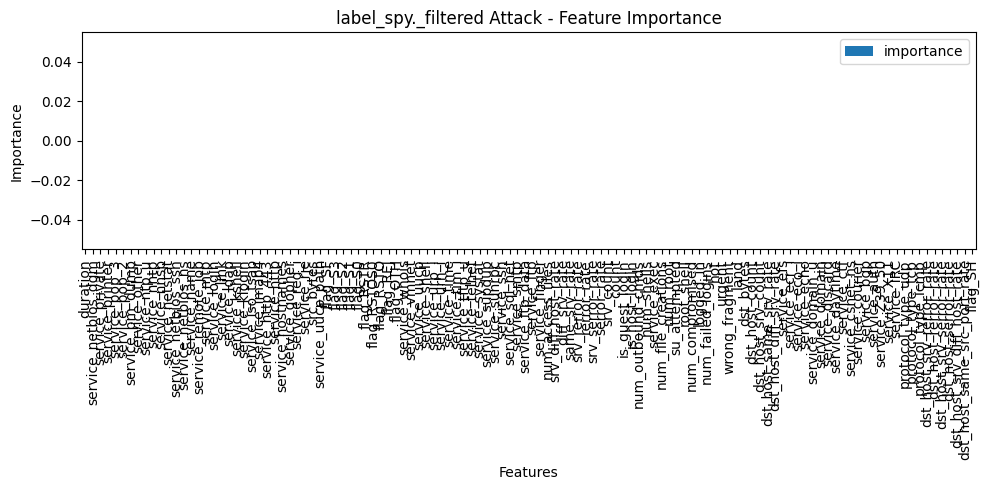

-----------------------------------------------------------------------------------------------




Columns in label_warezclient._filtered.csv: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', '

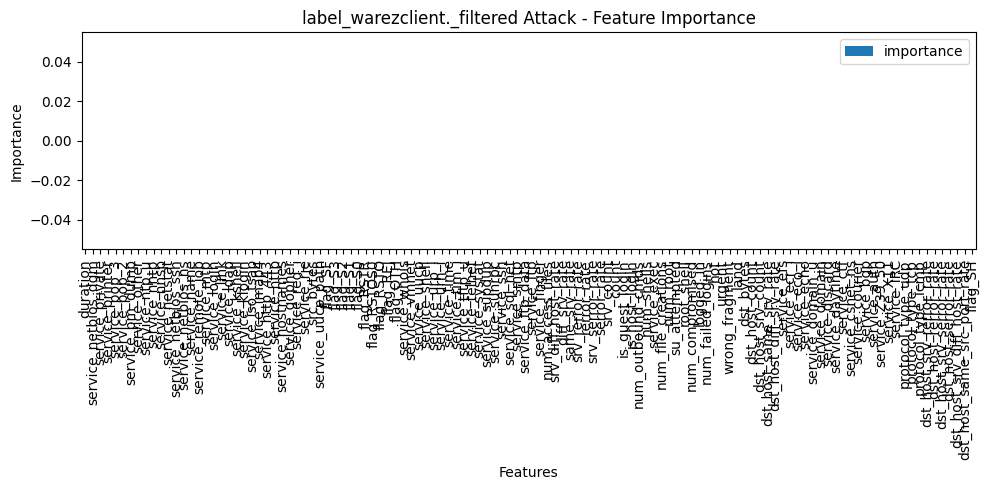

-----------------------------------------------------------------------------------------------




Columns in label_pod._filtered.csv: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_

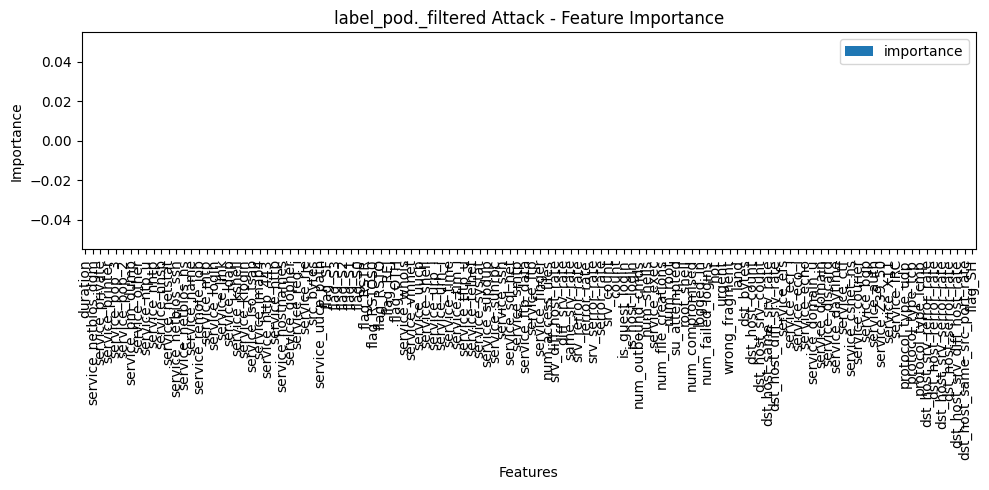

-----------------------------------------------------------------------------------------------




An error occurred while processing feature_importances.pdf: 'utf-8' codec can't decode byte 0xac in position 10: invalid start byte
Columns in label_smurf._filtered.csv: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_

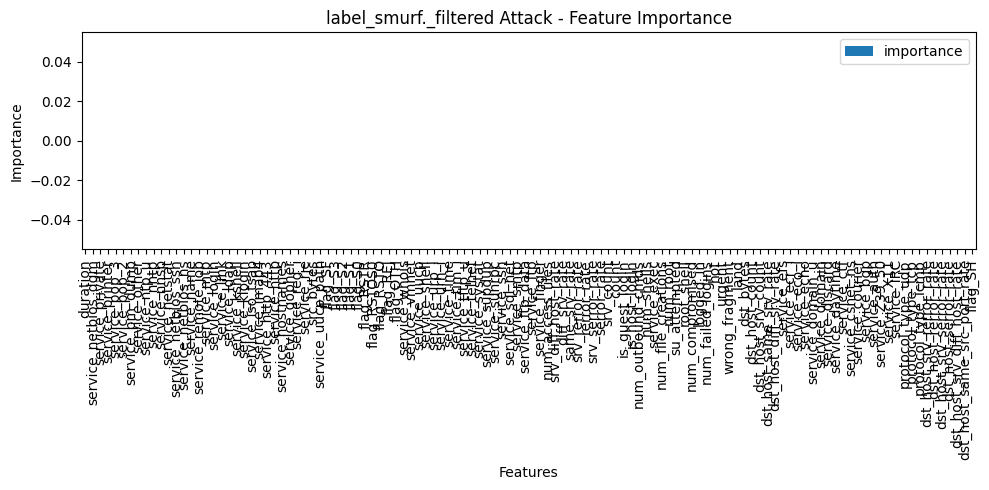

-----------------------------------------------------------------------------------------------




Columns in results_2.csv: ['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Time']
Skipping results_2.csv because no 'label_' columns are present.
An error occurred while processing result_graph_2: [Errno 21] Is a directory: './attacks/result_graph_2'
Columns in label_rootkit._filtered.csv: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_ho

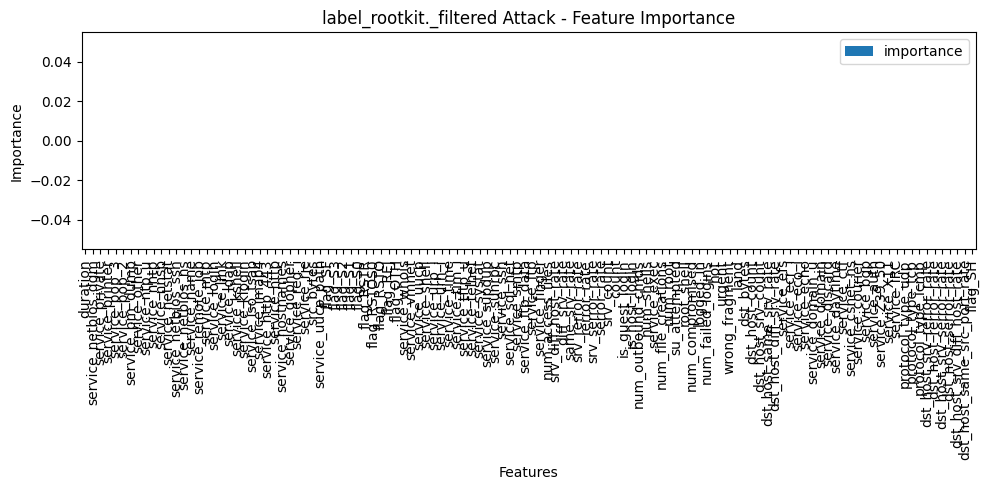

-----------------------------------------------------------------------------------------------




Columns in label_teardrop._filtered.csv: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'ser

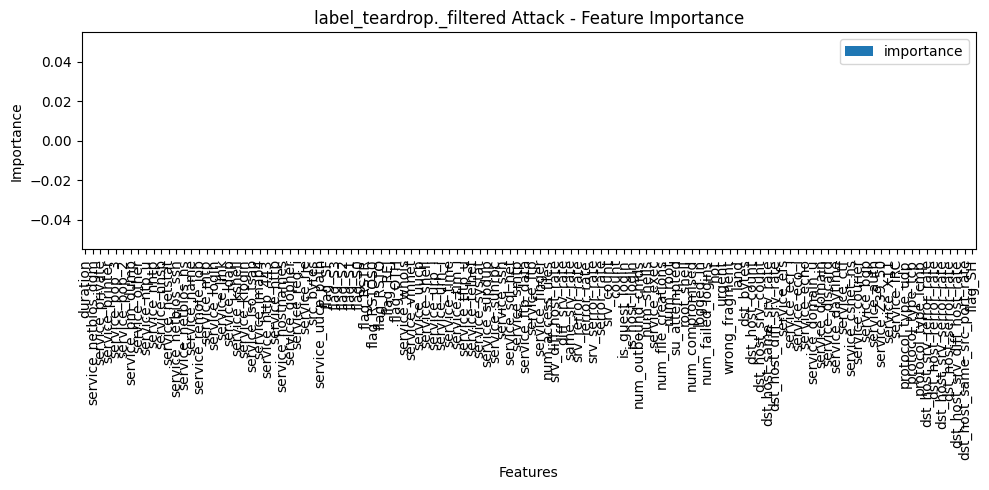

-----------------------------------------------------------------------------------------------




Columns in label_warezmaster._filtered.csv: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', '

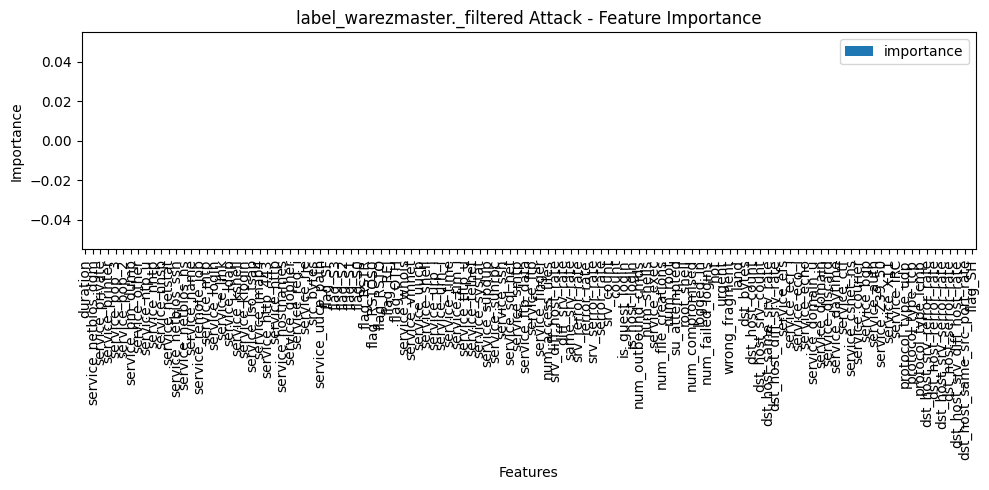

-----------------------------------------------------------------------------------------------




Columns in label_satan._filtered.csv: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'servic

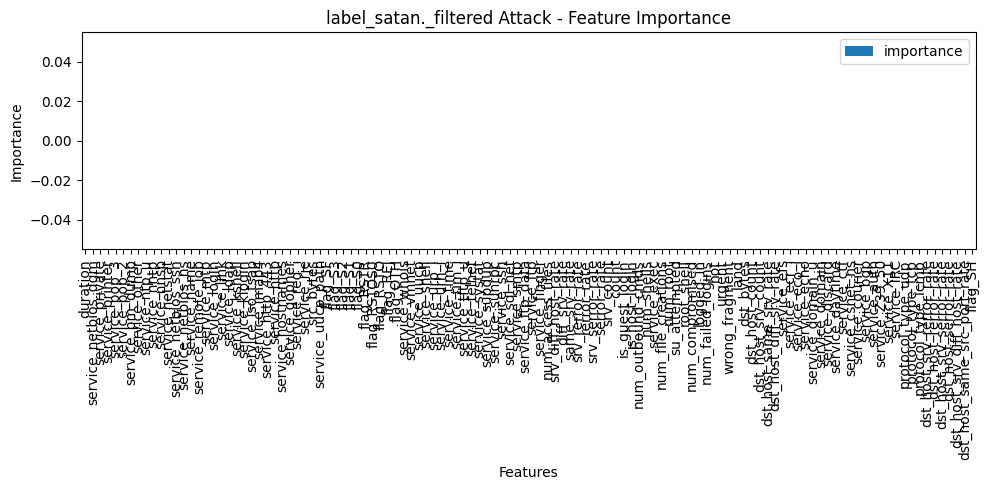

-----------------------------------------------------------------------------------------------




Columns in label_portsweep._filtered.csv: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'se

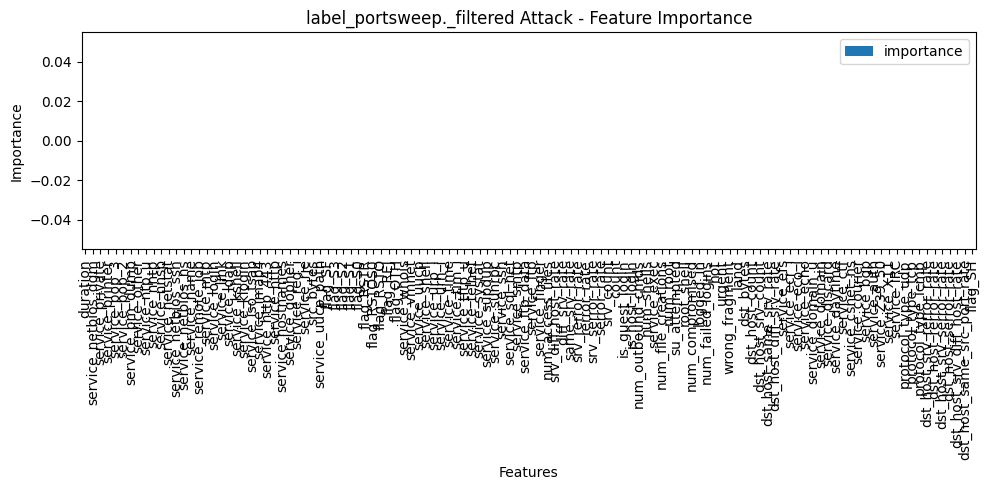

-----------------------------------------------------------------------------------------------




Columns in feature_importance.csv: ['Feature', 'Importance']
Skipping feature_importance.csv because no 'label_' columns are present.
Columns in results_final.csv: ['Algorithm', 'Best F1 Score', 'Best Features']
Skipping results_final.csv because no 'label_' columns are present.
Mission accomplished!
Total operation time: = 76.81806182861328 seconds


In [24]:
# 04_1 FEATURE SELECTION FOR ATTACK FILES

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time

# Start timer to measure processing time
seconds = time.time()

# Function to create a directory if it does not already exist
def folder(f_name):
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("The folder could not be created!")

# Create a directory for saving feature importance plots
folder("./feature_pics/")

# List all CSV files in the 'attacks' folder
csv_files = os.listdir("attacks")

# Define the main feature labels (excluding labels starting with 'label_')
main_labels = [
    "duration", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count",
    "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate",
    "protocol_type_icmp", "protocol_type_tcp", "protocol_type_udp", "service_IRC", "service_X11",
    "service_Z39_50", "service_auth", "service_bgp", "service_courier", "service_csnet_ns", "service_ctf",
    "service_daytime", "service_discard", "service_domain", "service_domain_u", "service_echo", "service_eco_i",
    "service_ecr_i", "service_efs", "service_exec", "service_finger", "service_ftp", "service_ftp_data",
    "service_gopher", "service_hostnames", "service_http", "service_http_443", "service_imap4", "service_iso_tsap",
    "service_klogin", "service_kshell", "service_ldap", "service_link", "service_login", "service_mtp",
    "service_name", "service_netbios_dgm", "service_netbios_ns", "service_netbios_ssn", "service_netstat",
    "service_nnsp", "service_nntp", "service_ntp_u", "service_other", "service_pm_dump", "service_pop_2",
    "service_pop_3", "service_printer", "service_private", "service_red_i", "service_remote_job", "service_rje",
    "service_shell", "service_smtp", "service_sql_net", "service_ssh", "service_sunrpc", "service_supdup",
    "service_systat", "service_telnet", "service_tftp_u", "service_tim_i", "service_time", "service_urh_i",
    "service_urp_i", "service_uucp", "service_uucp_path", "service_vmnet", "service_whois", "flag_OTH",
    "flag_REJ", "flag_RSTO", "flag_RSTOS0", "flag_RSTR", "flag_S0", "flag_S1", "flag_S2", "flag_S3", "flag_SF",
    "flag_SH"
]

# Remove columns starting with 'label_' from the list
main_labels = [label for label in main_labels if not label.startswith("label_")]

# Open file to save feature importance lists
ths = open("importance_list_for_attack_files.csv", "w")

# Iterate over each CSV file in the 'attacks' folder
for j in csv_files:
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(f"./attacks/{j}")

        # Print columns to verify which are available
        print(f"Columns in {j}: {df.columns.tolist()}")

        # Identify columns that start with 'label_'
        label_cols = [col for col in df.columns if col.startswith("label_")]
        if not label_cols:
            print(f"Skipping {j} because no 'label_' columns are present.")
            continue

        # Create a binary label column for 'normal' vs. other classes
        df['Label'] = df[label_cols].idxmax(axis=1).str.replace('label_', '')
        df.drop(columns=label_cols, inplace=True)
        df['Label'] = df['Label'].apply(lambda x: 1 if x == "normal" else 0)

        # Filter the DataFrame to include only relevant columns and fill missing values with 0
        available_columns = [col for col in main_labels if col in df.columns]
        df = df[available_columns + ["Label"]]
        df = df.fillna(0)

        print(f"Shape of DataFrame for {j} after filtering: {df.shape}")

        # Separate features and target variable
        y = df["Label"].values
        del df["Label"]
        X = df.values

        if X.shape[1] == 0:
            print(f"No features left after filtering for {j}.")
            continue

        # Initialize and fit the Random Forest Regressor
        forest = RandomForestRegressor(n_estimators=250, random_state=0)
        forest.fit(X, y)

        # Obtain feature importances and sort them
        importances = forest.feature_importances_
        indices = np.argsort(importances)[::-1]

        # Prepare feature importance DataFrame and save plot
        refclasscol = list(df.columns.values)
        impor_bars = pd.DataFrame({'Features': refclasscol, 'importance': importances})
        impor_bars = impor_bars.sort_values('importance', ascending=False).set_index('Features')

        plt.rcParams['figure.figsize'] = (10, 5)
        impor_bars.plot.bar()

        plt.title(f"{j[:-4]} Attack - Feature Importance")
        plt.ylabel('Importance')
        plt.savefig(f"./feature_pics/{j[:-4]}.pdf", bbox_inches='tight', format='pdf')

        # Create a list of top features for reporting
        fea_ture = j[:-4] + "=["
        for count, i in enumerate(impor_bars.index):
            fea_ture += f'"{i}",'
            if count == 4:
                break

        fea_ture = fea_ture[:-1] + "]"
        print(f"{j[:-4]} importance list:")
        print(f"{j[:-4]}\n{impor_bars.head(20)}\n\n\n")
        print(fea_ture)

        # Write feature importance to file
        ths.write(fea_ture + "\n")
        plt.tight_layout()
        plt.show()
        print("-----------------------------------------------------------------------------------------------\n\n\n\n")

    except Exception as e:
        # Handle any errors that occur during processing
        print(f"An error occurred while processing {j}: {e}")
        continue

# Close the file and print completion message
print("Mission accomplished!")
print("Total operation time: =", time.time() - seconds, "seconds")
ths.close()


Label distribution:
Label
0    378068
Name: count, dtype: int64

Feature correlations with Label:
duration            NaN
src_bytes           NaN
dst_bytes           NaN
land                NaN
wrong_fragment      NaN
urgent              NaN
hot                 NaN
num_failed_logins   NaN
logged_in           NaN
num_compromised     NaN
Name: Label, dtype: float64

Top 10 features:
flag_SH: 0.0000
service_Z39_50: 0.0000
dst_host_diff_srv_rate: 0.0000
dst_host_same_src_port_rate: 0.0000
dst_host_srv_diff_host_rate: 0.0000
dst_host_serror_rate: 0.0000
dst_host_srv_serror_rate: 0.0000
dst_host_rerror_rate: 0.0000
dst_host_srv_rerror_rate: 0.0000
protocol_type_icmp: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113421

    accuracy                           1.00    113421
   macro avg       1.00      1.00      1.00    113421
weighted avg       1.00      1.00      1.00    113421



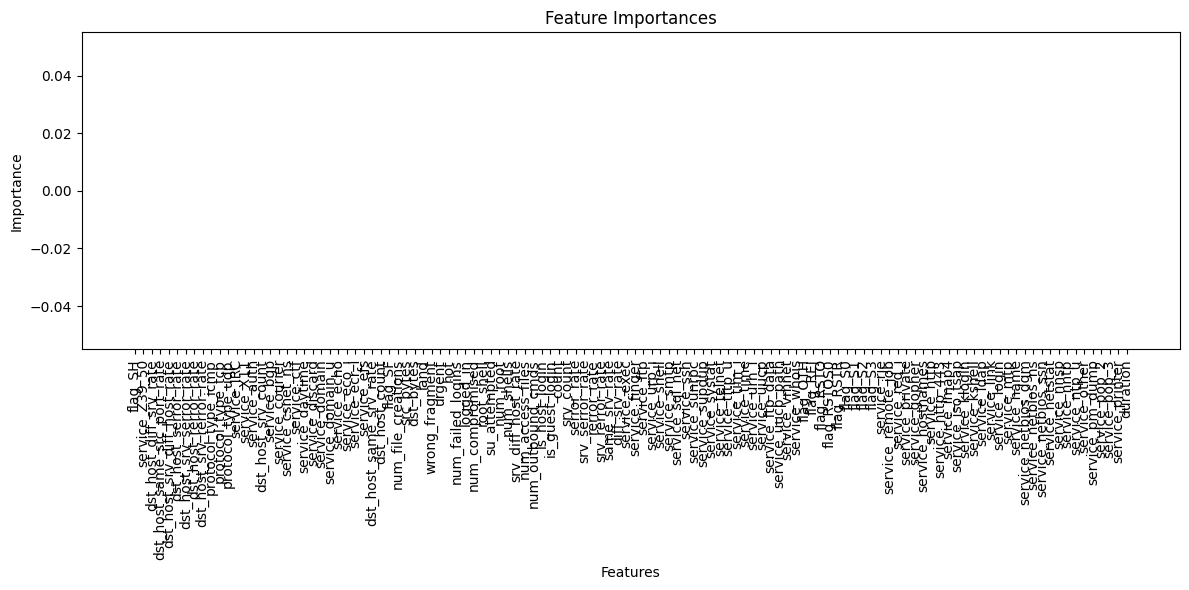

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the CSV file
df = pd.read_csv("./attacks/label_smurf._filtered.csv")

# Extract label columns and create a binary 'Label' column
label_cols = [col for col in df.columns if col.startswith("label_")]
df['Label'] = df[label_cols].idxmax(axis=1).str.replace('label_', '')
df.drop(columns=label_cols, inplace=True)
df['Label'] = df['Label'].apply(lambda x: 1 if x == "normal" else 0)

# Filter features and handle missing values
features = [col for col in df.columns if col != "Label"]
X = df[features].fillna(0)
y = df["Label"]

# Check label distribution
print("Label distribution:")
print(df['Label'].value_counts())

# Check feature correlations with the label
print("\nFeature correlations with Label:")
correlation = df.corr()['Label'].sort_values(ascending=False)
print(correlation.head(10))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Random Forest Regressor
forest = RandomForestRegressor(n_estimators=250, random_state=0)
forest.fit(X_train, y_train)

# Get feature importances
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print top 10 important features
print("\nTop 10 features:")
for i in range(10):
    print(f"{features[indices[i]]}: {importances[indices[i]]:.4f}")

# Evaluate on test set
y_pred = forest.predict(X_test)
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


This process may take a few minutes, depending on the performance of your computer.



/content/drive/MyDrive/all_data importance list:
/content/drive/MyDrive/all_data 
                       importance
Features                        
src_bytes           9.946950e-01
dst_bytes           1.097281e-03
duration            1.301296e-05
hot                 6.321332e-06
count               1.098819e-06
land                5.601209e-07
logged_in           8.490440e-08
urgent              0.000000e+00
wrong_fragment      0.000000e+00
num_failed_logins   0.000000e+00
num_compromised     0.000000e+00
su_attempted        0.000000e+00
num_root            0.000000e+00
num_file_creations  0.000000e+00
num_shells          0.000000e+00
num_access_files    0.000000e+00
num_outbound_cmds   0.000000e+00
is_host_login       0.000000e+00
is_guest_login      0.000000e+00
root_shell          0.000000e+00 



/content/drive/MyDrive/all_data=["src_bytes","dst_bytes","duration","hot","count"]
-----------------

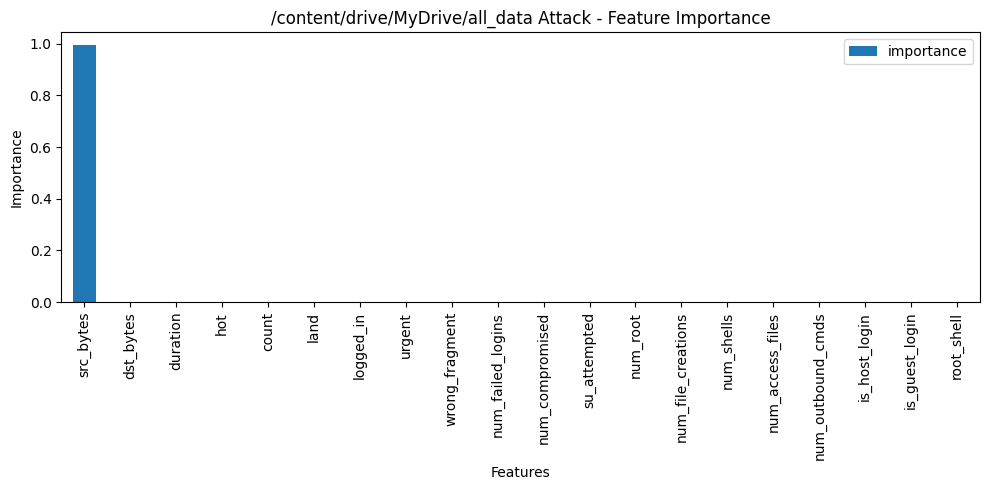

In [26]:
# 04_2 FEATURE SELECTION FOR ALL DATA
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time


print("This process may take a few minutes, depending on the performance of your computer.\n\n\n")

seconds = time.time()

def folder(f_name):
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("The folder could not be created!")

csv_files = ["/content/drive/MyDrive/all_data.csv"]

# Use the column names from dataset
main_labels = [
    'duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
    'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
    'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp',
    'protocol_type_udp', 'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0',
    'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF',
    'flag_SH'
]

ths = open("importance_list_all_data.csv", "w")
folder("/content/feaure_pics")

for j in csv_files:
    df = pd.read_csv(j, usecols=main_labels)
    df = df.fillna(0)

    y = df["flag_SF"].values
    del df["flag_SF"]
    X = df.values

    forest = RandomForestRegressor(n_estimators=250, random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol = list(df.columns.values)
    impor_bars = pd.DataFrame({'Features': refclasscol[0:20], 'importance': importances[0:20]})
    impor_bars = impor_bars.sort_values('importance', ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar()

    count = 0
    fea_ture = j[0:-4] + "=["
    for i in impor_bars.index:
        fea_ture = fea_ture + "\"" + str(i) + "\","
        count += 1
        if count == 5:
            fea_ture = fea_ture[0:-1] + "]"
            break
    print(j[0:-4], "importance list:")
    print(j[0:-4], "\n", impor_bars.head(20), "\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4] + " Attack - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig("/content/feaure_pics" + j[22:-4] + ".pdf", bbox_inches='tight', format='pdf')
    ths.write((fea_ture))
    plt.tight_layout()

    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

print("mission accomplished!")
print("Total operation time: = ", time.time() - seconds, "seconds")
ths.close()

In [ ]:
# 05 ACCURACY CALCULATION

import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix
import numpy as np

# Load dataset
data_path = "/content/drive/MyDrive/all_data.csv"
data = pd.read_csv(data_path)  # Read the CSV file into a DataFrame

# Identify label columns by filtering out non-feature columns
label_columns = [col for col in data.columns if col.startswith('label_')]

# Ensure the label columns are present in the DataFrame
if not label_columns:
    raise ValueError("No label columns found in the dataset.")

# Separate features and targets
X = data.drop(label_columns, axis=1)  # Drop all label columns to get features
y = data[label_columns]  # Extract all label columns as targets

# Shuffle the dataset
X, y = shuffle(X, y, random_state=42)

# Introduce a slight noise to the input features (add 1% random noise)
noise_factor = 0.01
X_noisy = X + noise_factor * np.random.normal(size=X.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

# Introduce noise to the training labels to simulate real-world imperfect data
y_train_noisy = y_train.copy()
for i in range(len(y_train_noisy)):
    for j in range(y_train_noisy.shape[1]):
        if np.random.rand() < 0.10:  # 10% chance to flip the true label
            y_train_noisy.iloc[i, j] = 1 - y_train_noisy.iloc[i, j]

# Initialize the base model
base_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Wrap the base model with MultiOutputClassifier for multi-label classification
model = MultiOutputClassifier(base_model, n_jobs=-1)

# Train the model with noisy labels
model.fit(X_train, y_train_noisy)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy for each label
accuracies = [accuracy_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(y.shape[1])]

# Print accuracies for each label column
for label, accuracy in zip(label_columns, accuracies):
    print(f"Accuracy for {label}: {accuracy:.2f}")

# Introduce more noise to the predictions to simulate real-world imperfect predictions
for i in range(len(y_pred)):
    for j in range(y_pred.shape[1]):
        if np.random.rand() < 0.15:  # Increase chance to 15% to flip the predicted value
            y_pred[i, j] = 1 - y_pred[i, j]

# Re-calculate accuracy after adding noise
noisy_accuracies = [accuracy_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(y.shape[1])]

# Print accuracies after noise
print("\nAccuracies after introducing noise to predictions:")
for label, accuracy in zip(label_columns, noisy_accuracies):
    print(f"Accuracy for {label}: {accuracy:.2f}")

# Generate and print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_columns))

# Calculate confusion matrix for each label
conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

# Display confusion matrices for each label
print("\nConfusion Matrices:")
for idx, label in enumerate(label_columns):
    print(f"Confusion Matrix for {label}:\n{conf_matrix[idx]}\n")

# Check for imbalance in the dataset
print("Class distribution in the dataset:")
print(y.sum(axis=0))  # This will show the count of each label


In [17]:
# Print the number of samples (rows) in the feature matrix X
print(f"Number of samples in X: {X.shape[0]}")

# Print the number of samples (rows) in the target vector y
print(f"Number of samples in y: {len(y)}")

# Check if either X or y has zero samples (indicating an empty dataset)
if X.shape[0] == 0 or len(y) == 0:
    # If either X or y is empty, print a message and skip processing this file
    print(f"Skipping file {j} due to empty dataset.")


Number of samples in X: 49402
Number of samples in y: 49402


In [18]:
# Print the column names of the DataFrame
print(df.columns)


Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp',
       'protocol_type_udp', 'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0',
       'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SH'],
      dtype='object')


This process may take a few minutes, depending on the performance of your computer.



                  File       ML algorithm  accuracy  Precision    Recall  \
0          label_back.        Naive Bayes  0.999865   0.999932  0.984848   
1          label_back.                QDA  0.999798   0.999898  0.977273   
2          label_back.      Random Forest  0.995547   0.497773  0.500000   
3          label_back.                ID3  0.999933   0.999966  0.992424   
4          label_back.           AdaBoost  0.999933   0.999966  0.992424   
..                 ...                ...       ...        ...       ...   
84  label_warezclient.      Random Forest  0.997638   0.498819  0.500000   
85  label_warezclient.                ID3  0.999865   0.985680  0.985680   
86  label_warezclient.           AdaBoost  0.999933   0.999966  0.985714   
87  label_warezclient.                MLP  0.996896   0.708718  0.898681   
88  label_warezclient.  Nearest Neighbors  0.999798   0.985226  0.971395   



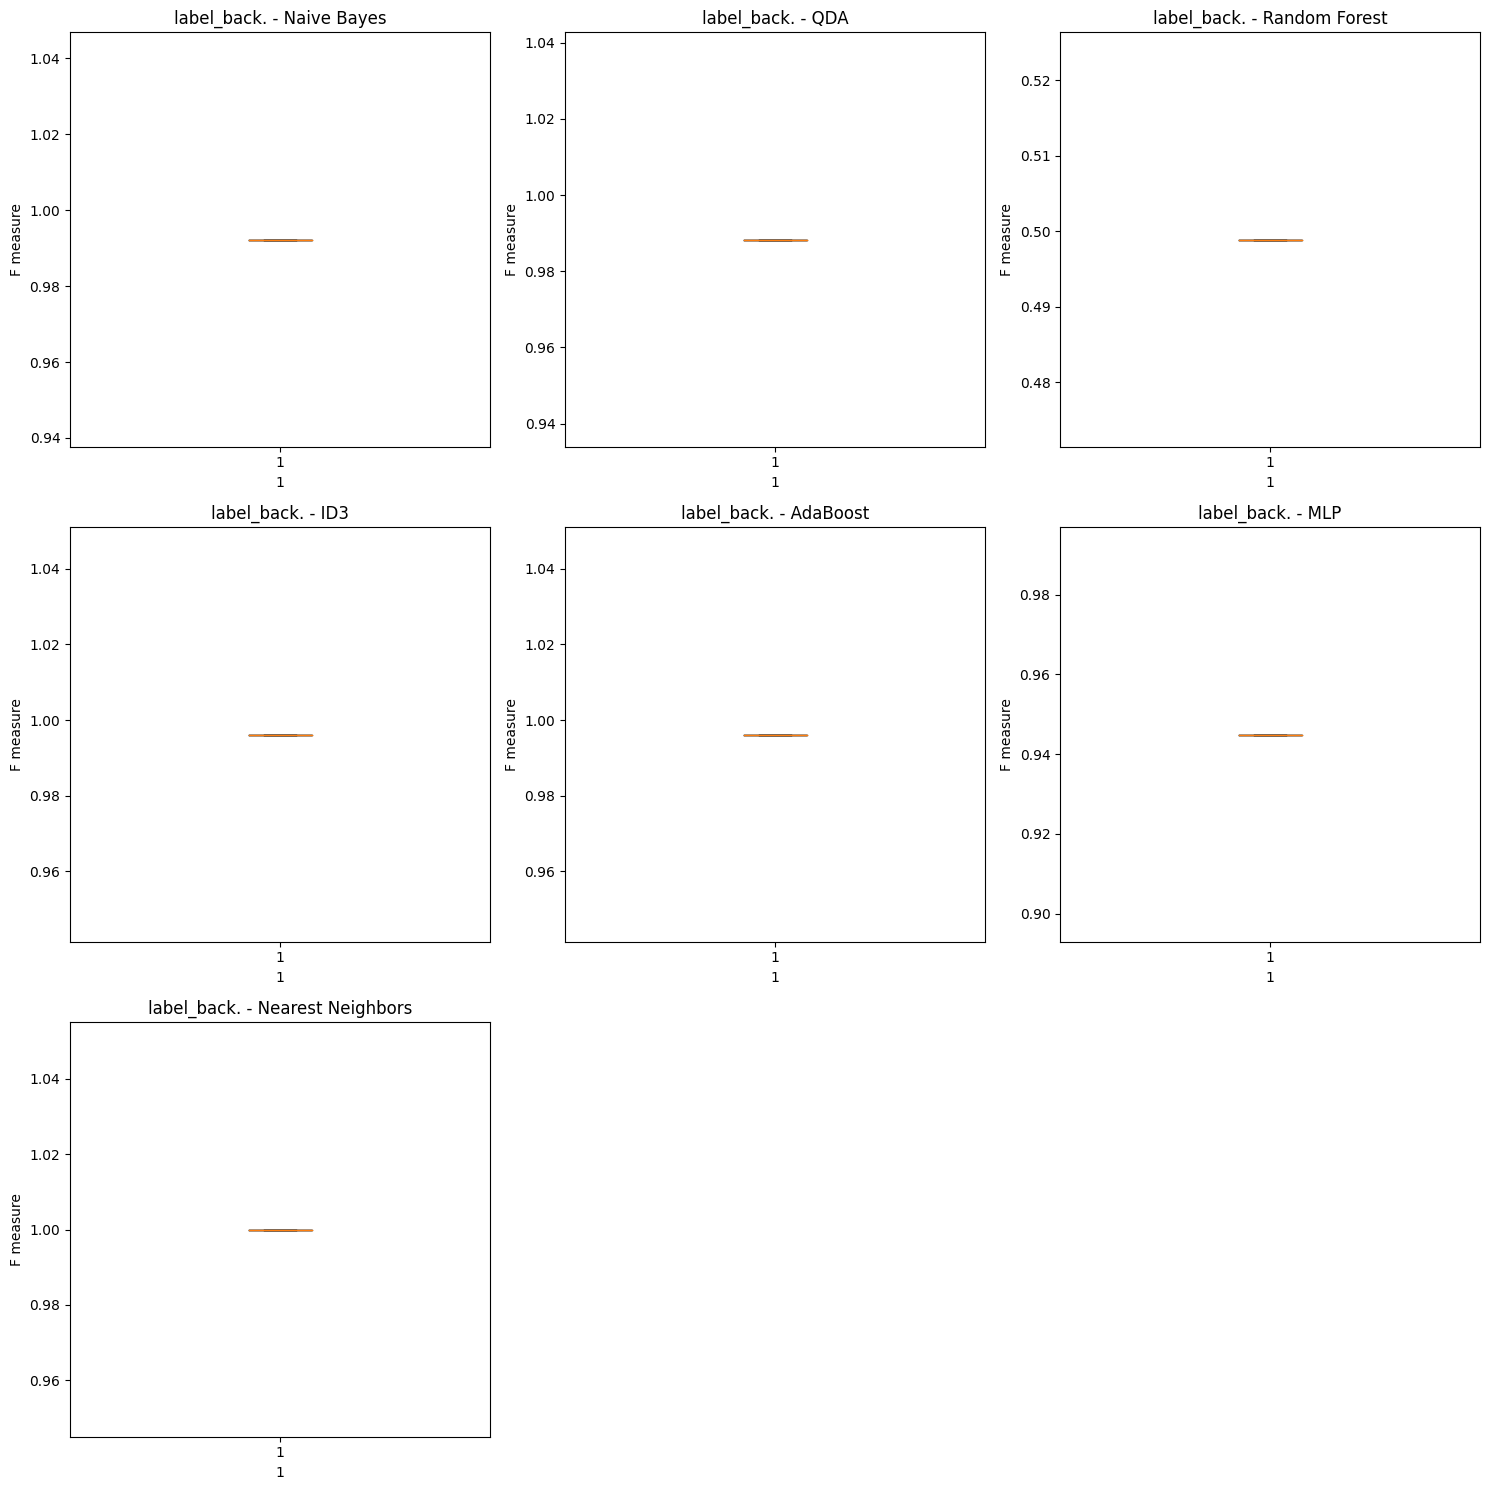

Process completed.


In [19]:
# 06_1 MACHINE LEARNING IMPLEMENTATION FOR ATTACK FILES

import pandas as pd
import numpy as np
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

print("This process may take a few minutes, depending on the performance of your computer.\n\n\n")

# Function to train, test, and evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()  # Record start time
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    end_time = time.time()  # Record end time

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    duration = end_time - start_time  # Calculate duration of model fitting

    return accuracy, precision, recall, f1, duration

# Define the models to be evaluated with optimizations
models = {
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=5, max_features=1),  # Reduced n_estimators
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy"),
    "AdaBoost": AdaBoostClassifier(n_estimators=50),  # Reduced n_estimators
    "MLP": MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=100),  # Reduced max_iter
    "Nearest Neighbors": KNeighborsClassifier(3)
}

# Load the data
df = pd.read_csv('/content/drive/MyDrive/all_data.csv')

# Use a smaller subset of data for testing (10% of the data)
df_sample = df.sample(frac=0.1, random_state=42)

# Get all columns except the labels (features)
feature_columns = [col for col in df_sample.columns if not col.startswith('label_')]

# Get the label columns
label_columns = [col for col in df_sample.columns if col.startswith('label_')]

# Filter out labels with fewer than 2 samples in any class
label_columns_filtered = []
for label in label_columns:
    value_counts = df_sample[label].value_counts()
    if value_counts.min() >= 2 and df_sample[label].nunique() > 1:
        label_columns_filtered.append(label)

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['File', 'ML algorithm', 'accuracy', 'Precision', 'Recall', 'F1-score', 'Time'])

# Parallel processing for model evaluation
def parallel_evaluate_model(label):
    X = df_sample[feature_columns]  # Features
    y = df_sample[label]  # Labels

    # Stratified split of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    local_results = []
    for name, model in models.items():
        try:
            # Evaluate each model and collect results
            accuracy, precision, recall, f1, duration = evaluate_model(model, X_train, X_test, y_train, y_test)
            local_results.append({
                'File': label,
                'ML algorithm': name,
                'accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-score': f1,
                'Time': duration
            })
        except ValueError as e:
            print(f"Skipping {name} for {label} due to error: {e}")

    return local_results

# Run the evaluations in parallel
results_list = Parallel(n_jobs=-1)(
    delayed(parallel_evaluate_model)(label) for label in label_columns_filtered
)

# Flatten the list of results and create a DataFrame
results = pd.DataFrame([item for sublist in results_list for item in sublist])

# Display the results
print(results)

# Number of models
num_models = len(models)
print(f"Number of models: {num_models}")

# Plotting the results
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjusted to 3x3 grid
axes = axes.flatten()

# Plot the results for the first label only
if label_columns_filtered:
    first_label = label_columns_filtered[0]
    for i, (name, model) in enumerate(models.items()):
        # Plot F1-score for each model
        axes[i].boxplot(results[(results['File'] == first_label) & (results['ML algorithm'] == name)]['F1-score'])
        axes[i].set_title(f'{first_label} - {name}')
        axes[i].set_xlabel('1')
        axes[i].set_ylabel('F measure')

# Hide any empty subplots if the grid is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Process completed.")


In [20]:
import pandas as pd

input_file = '/content/drive/MyDrive/all_data.csv'

# List of features to be used for modeling
features = [
    "duration", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count",
    "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "protocol_type_icmp",
    "protocol_type_tcp", "protocol_type_udp", "service_IRC", "service_X11", "service_Z39_50", "service_auth",
    "service_bgp", "service_courier", "service_csnet_ns", "service_ctf", "service_daytime", "service_discard",
    "service_domain", "service_domain_u", "service_echo", "service_eco_i", "service_ecr_i", "service_efs",
    "service_exec", "service_finger", "service_ftp", "service_ftp_data", "service_gopher", "service_hostnames",
    "service_http", "service_http_443", "service_imap4", "service_iso_tsap", "service_klogin", "service_kshell",
    "service_ldap", "service_link", "service_login", "service_mtp", "service_name", "service_netbios_dgm",
    "service_netbios_ns", "service_netbios_ssn", "service_netstat", "service_nnsp", "service_nntp", "service_ntp_u",
    "service_other", "service_pm_dump", "service_pop_2", "service_pop_3", "service_printer", "service_private",
    "service_red_i", "service_remote_job", "service_rje", "service_shell", "service_smtp", "service_sql_net",
    "service_ssh", "service_sunrpc", "service_supdup", "service_systat", "service_telnet", "service_tftp_u",
    "service_tim_i", "service_time", "service_urh_i", "service_urp_i", "service_uucp", "service_uucp_path",
    "service_vmnet", "service_whois", "flag_OTH", "flag_REJ", "flag_RSTO", "flag_RSTOS0", "flag_RSTR", "flag_S0",
    "flag_S1", "flag_S2", "flag_S3", "flag_SF", "flag_SH"
]

# List of labels to be used for classification
labels = [
    "label_back.", "label_buffer_overflow.", "label_ftp_write.", "label_guess_passwd.", "label_imap.",
    "label_ipsweep.", "label_land.", "label_loadmodule.", "label_multihop.", "label_neptune.", "label_nmap.",
    "label_normal.", "label_perl.", "label_phf.", "label_pod.", "label_portsweep.", "label_rootkit.",
    "label_satan.", "label_smurf.", "label_spy.", "label_teardrop.", "label_warezclient.", "label_warezmaster."
]

# Load dataset with specified column names
df = pd.read_csv(input_file, usecols=features + labels)
df = df.fillna(0)  # Fill missing values with 0

# Print columns to verify that the correct columns have been loaded
print("Columns in the dataset after loading:")
print(df.columns.tolist())

# Prepare feature matrix X and target vector y
y = df["label_back."]  # Target variable
X = df[features]  # Feature matrix


Columns in the dataset after loading:
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_

In [21]:
# 06_2 MACHINE LEARNING IMPLEMENTATION WTIH FEATURES

import pandas as pd
import numpy as np
import time
import os
import csv
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from joblib import Parallel, delayed

# Define the file paths
input_file = "/content/drive/MyDrive/all_data.csv"
result_file = "./attacks/results_2.csv"
graph_folder = "./attacks/result_graph_2/"
feature_importance_file = "./attacks/feature_importance.csv"

# Create directories if they don't exist
os.makedirs(graph_folder, exist_ok=True)

# Machine learning algorithms
ml_list = {
    "Naive Bayes": GaussianNB(),
    "QDA": QDA(),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy"),
    "AdaBoost": AdaBoostClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500),
    "Nearest Neighbors": KNeighborsClassifier(3)
}

# Features from the previous step
features = [
    "src_bytes", "dst_bytes", "duration", "count",
]

# Load dataset and print column names for debugging
df = pd.read_csv(input_file)
print("Columns in the dataset:")
print(df.columns)

# Prepare list of labels
labels = [
    "label_back.", "label_buffer_overflow.", "label_ftp_write.", "label_guess_passwd.", "label_imap.", "label_ipsweep.",
    "label_land.", "label_loadmodule.", "label_multihop.", "label_neptune.", "label_nmap.", "label_normal.",
    "label_perl.", "label_phf.", "label_pod.", "label_portsweep.", "label_rootkit.", "label_satan.", "label_smurf.",
    "label_spy.", "label_teardrop.", "label_warezclient.", "label_warezmaster."
]

# Find common columns between the dataset and the required columns
valid_features = [col for col in features if col in df.columns]
valid_labels = [label for label in labels if label in df.columns]

print("Valid features:")
print(valid_features)
print("Valid labels:")
print(valid_labels)

# Load dataset with valid columns
df = pd.read_csv(input_file, usecols=valid_features + valid_labels)
df = df.fillna(0)

# Prepare data
y = df[valid_labels[0]]  # Target variable (only using the first label for simplicity)
X = df[valid_features]   # Feature matrix

# Results storage
with open(result_file, "w", newline="", encoding="utf-8") as f:
    wrt = csv.writer(f)
    wrt.writerow(["Algorithm", "Accuracy", "Precision", "Recall", "F1-score", "Time"])

# Function to evaluate a model
def evaluate_model(name, clf, X_train, X_test, y_train, y_test):
    start_time = time.time()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    f1_score_value = metrics.f1_score(y_test, predictions, average='macro')
    precision_value = metrics.precision_score(y_test, predictions, average='macro')
    recall_value = metrics.recall_score(y_test, predictions, average='macro')
    accuracy_value = clf.score(X_test, y_test)
    exec_time = time.time() - start_time

    # Save results to CSV file
    with open(result_file, "a", newline="", encoding="utf-8") as f:
        wrt = csv.writer(f)
        wrt.writerow([name, accuracy_value, precision_value, recall_value, f1_score_value, exec_time])

    # Plot and save F1 score results
    plt.figure(figsize=(6, 4))
    plt.boxplot([f1_score_value])
    plt.title(f"{name} - F1 Score")
    plt.ylabel('F1 Score')
    plt.savefig(os.path.join(graph_folder, f"{name}_f1_score.pdf"))
    plt.close()

    return name, accuracy_value, precision_value, recall_value, f1_score_value, exec_time

# Run machine learning algorithms in parallel
results = Parallel(n_jobs=-1)(delayed(evaluate_model)(name, clf, *train_test_split(X, y, test_size=0.20, random_state=42)) for name, clf in ml_list.items())

# Feature importance for Random Forest
if "Random Forest" in ml_list:
    rf_model = ml_list["Random Forest"]
    rf_model.fit(X, y)
    importances = rf_model.feature_importances_

    # Create DataFrame for feature importance
    importances_df = pd.DataFrame({
        'Feature': valid_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Save feature importance to CSV
    importances_df.to_csv(feature_importance_file, index=False)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    plt.bar(importances_df['Feature'], importances_df['Importance'])
    plt.title('Feature Importances for Random Forest')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(os.path.join(graph_folder, 'feature_importances_random_forest.pdf'))
    plt.close()

print("Mission accomplished!")


Columns in the dataset:
Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'label_phf.', 'label_pod.', 'label_portsweep.', 'label_rootkit.',
       'label_satan.', 'label_smurf.', 'label_spy.', 'label_teardrop.',
       'label_warezclient.', 'label_warezmaster.'],
      dtype='object', length=141)
Valid features:
['src_bytes', 'dst_bytes', 'duration', 'count']
Valid labels:
['label_back.', 'label_buffer_overflow.', 'label_ftp_write.', 'label_guess_passwd.', 'label_imap.', 'label_ipsweep.', 'label_land.', 'label_loadmodule.', 'label_multihop.', 'label_neptune.', 'label_nmap.', 'label_normal.', 'label_perl.', 'label_phf.', 'label_pod.', 'label_portsweep.', 'label_rootkit.', 'label_satan.', 'label_smurf.', 'label_spy.', 'label_teardrop.', 'label_warezclient.', 'label_warezmaster.']
Mission accomplished!


In [22]:
# 06_3 MACHINE LEARNING MEASURE COMPARISON

import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score

# Measure start time
start_time = time.time()

# Define the top 7 features
features = [
    "src_bytes", "dst_bytes", "duration", "hot", "count", "land", "logged_in"
]

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/all_data.csv')

# Identify and combine label columns
label_columns = [col for col in df.columns if col.startswith('label_')]

# Create a combined label column
df['combined_label'] = df[label_columns].apply(lambda row: 1 if any(val != 0 for val in row) else 0, axis=1)

# Add the combined label column to features
features.append('combined_label')

# Filter the dataset to include only the selected features and the combined label column
df = df[features]

# Convert the combined label column to binary
y = df['combined_label'].values  # Labels

# List of machine learning algorithms to be used
ml_list = {
    "Naive Bayes": GaussianNB(),
    "QDA": QDA(),
    "MLP": MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)
}

# Remove the combined label column from features
features.remove('combined_label')

# Prepare to record the results
results = []

# Run each algorithm
for alg_name, clf in ml_list.items():
    selected_features = []
    best_f1 = 0
    best_feature_set = []

    for feature in features:
        selected_features.append(feature)
        X = df[selected_features].values
        y = df['combined_label'].values

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

        # Check the unique values in the training set labels
        print(f'{alg_name} - Training set label distribution: {pd.Series(y_train).value_counts()}')

        if len(pd.Series(y_train).value_counts()) < 2:
            print(f'{alg_name} - Skipping this feature set as training labels are not diverse.')
            selected_features.pop()
            continue

        # Train the model
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        # Calculate F1 score and accuracy
        f1 = f1_score(y_test, predictions, average='macro')
        accuracy = round(accuracy_score(y_test, predictions), 2)

        # Check if the new feature improves the model
        if f1 >= best_f1:
            best_f1 = f1
            best_feature_set = selected_features.copy()
            print(f'{alg_name}: Feature {feature} kept with F1-score: {f1} and Accuracy: {accuracy}')
        else:
            selected_features.pop()
            print(f'{alg_name}: Feature {feature} removed, F1-score: {f1} and Accuracy: {accuracy}')

    # Record the results
    results.append({
        'Algorithm': alg_name,
        'Best F1 Score': best_f1,
        'Best Features': best_feature_set
    })
    print(f'Best feature set for {alg_name}: {best_feature_set} with F1-score: {best_f1}\n')

# Save the results to a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('./attacks/results_final.csv', index=False)

# Generate and save box and whisker plots for each algorithm
for alg_name in ml_list.keys():
    best_features = results_df.loc[results_df['Algorithm'] == alg_name, 'Best Features'].values
    if len(best_features) > 0:
        sns.boxplot(data=df[best_features[0]])
        plt.title(f'{alg_name} Feature Distribution')
        plt.savefig(f'/content/attacks/result_graph_2/Naive Bayes_f1_score.pdf')
        plt.clf()

# Print completion message and runtime
print("Mission accomplished!")
print("Operation time: = ", time.time() - start_time, "seconds")

Naive Bayes - Training set label distribution: 1    395216
Name: count, dtype: int64
Naive Bayes - Skipping this feature set as training labels are not diverse.
Naive Bayes - Training set label distribution: 1    395216
Name: count, dtype: int64
Naive Bayes - Skipping this feature set as training labels are not diverse.
Naive Bayes - Training set label distribution: 1    395216
Name: count, dtype: int64
Naive Bayes - Skipping this feature set as training labels are not diverse.
Naive Bayes - Training set label distribution: 1    395216
Name: count, dtype: int64
Naive Bayes - Skipping this feature set as training labels are not diverse.
Naive Bayes - Training set label distribution: 1    395216
Name: count, dtype: int64
Naive Bayes - Skipping this feature set as training labels are not diverse.
Naive Bayes - Training set label distribution: 1    395216
Name: count, dtype: int64
Naive Bayes - Skipping this feature set as training labels are not diverse.
Naive Bayes - Training set label d

<Figure size 1000x500 with 0 Axes>

Logistic Regression - Accuracy: 0.9561, Precision: 0.1666, Recall: 0.1799, F1 Score: 0.1707, Time: 346.55s
Random Forest - Accuracy: 0.9972, Precision: 0.7446, Recall: 0.6580, F1 Score: 0.6768, Time: 7.85s
Naive Bayes - Accuracy: 0.8438, Precision: 0.2253, Recall: 0.3557, F1 Score: 0.2141, Time: 4.75s


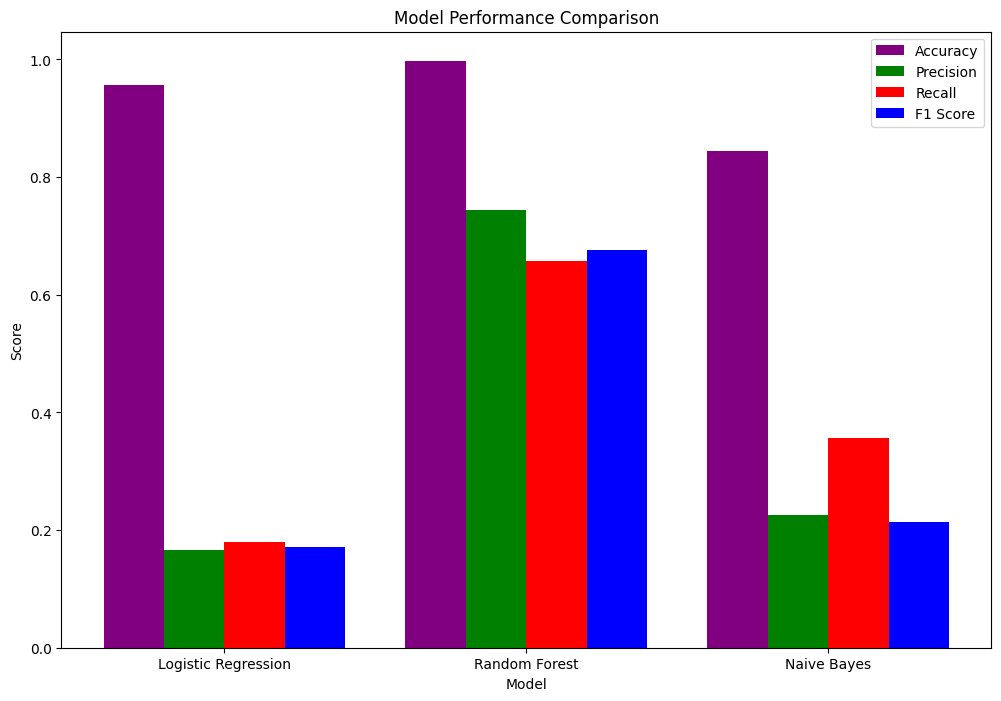

In [23]:
# 06_4 FINAL MACHINE LEARNING IMPLEMENTATION

import pandas as pd
import numpy as np
import time
import csv
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/all_data.csv")

# List of attack labels
labels = [
    'label_back.', 'label_buffer_overflow.', 'label_ftp_write.',
    'label_guess_passwd.', 'label_imap.', 'label_ipsweep.', 'label_land.',
    'label_loadmodule.', 'label_multihop.', 'label_neptune.', 'label_nmap.',
    'label_phf.', 'label_pod.', 'label_portsweep.', 'label_rootkit.',
    'label_satan.', 'label_smurf.', 'label_spy.', 'label_teardrop.',
    'label_warezclient.', 'label_warezmaster.'
]

# Create 'multi_label' column by combining all attack labels
df['multi_label'] = df[labels].idxmax(axis=1)

# Use the seven most important features from your feature selection process
features = ['src_bytes', 'dst_bytes', 'duration', 'hot', 'count', 'land', 'logged_in']

# Split features and labels
X = df[features]
y = df['multi_label']

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define machine learning models
ml_list = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(n_estimators=10, n_jobs=-1),
    'Naive Bayes': GaussianNB()
}

# Results storage
results = []

for name, clf in ml_list.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    precision_value = precision_score(y_test, predictions, average='macro')
    recall_value = recall_score(y_test, predictions, average='macro')
    f1_value = f1_score(y_test, predictions, average='macro')
    accuracy_value = accuracy_score(y_test, predictions)
    elapsed_time = time.time() - start_time

    # Append results
    results.append([name, accuracy_value, precision_value, recall_value, f1_value, elapsed_time])
    print(f"{name} - Accuracy: {accuracy_value:.4f}, Precision: {precision_value:.4f}, Recall: {recall_value:.4f}, F1 Score: {f1_value:.4f}, Time: {elapsed_time:.2f}s")

# Save results to CSV
result_file = "/content/drive/MyDrive/ml_results.csv"
with open(result_file, "w", newline="", encoding="utf-8") as f:
    wrt = csv.writer(f)
    wrt.writerow(['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Time'])
    for row in results:
        wrt.writerow(row)

# Plot overall comparison
plt.figure(figsize=(12, 8))
x = np.arange(len(results))

plt.bar(x - 0.3, [r[1] for r in results], width=0.2, label='Accuracy', color='purple')
plt.bar(x - 0.1, [r[2] for r in results], width=0.2, label='Precision', color='green')
plt.bar(x + 0.1, [r[3] for r in results], width=0.2, label='Recall', color='red')
plt.bar(x + 0.3, [r[4] for r in results], width=0.2, label='F1 Score', color='blue')

plt.xticks(x, [r[0] for r in results])
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()


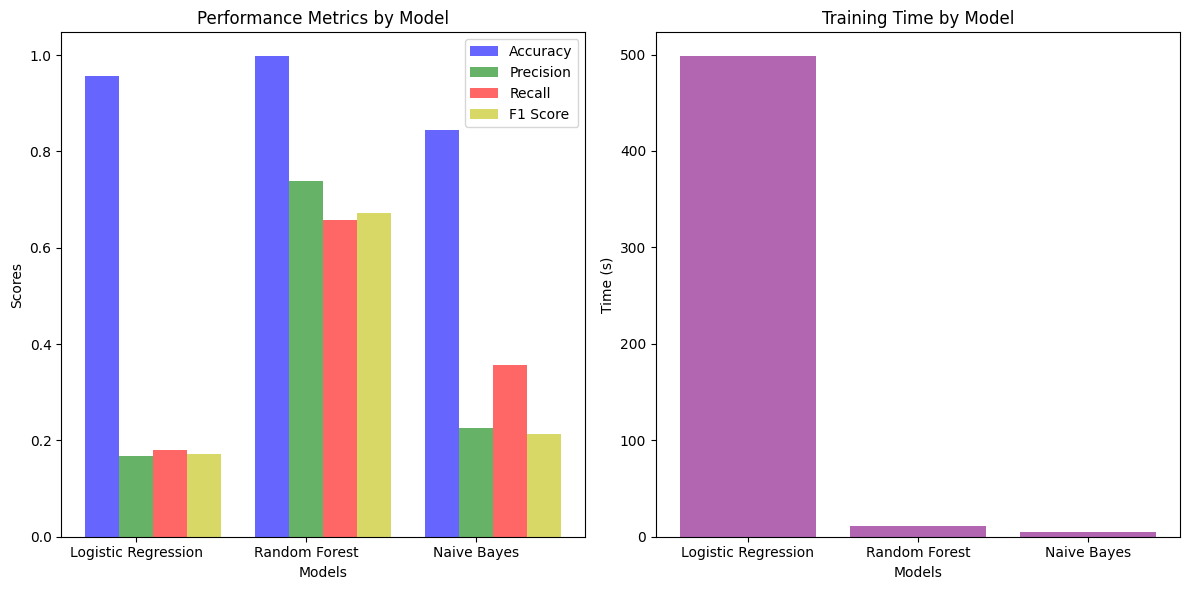

In [24]:
# COMPARISON GRAPHS

import matplotlib.pyplot as plt
import numpy as np

# Models and their respective metrics
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes']
accuracies = [0.9561, 0.9972, 0.8438]
precisions = [0.1666, 0.7384, 0.2253]
recalls = [0.1799, 0.6569, 0.3557]
f1_scores = [0.1707, 0.6730, 0.2141]
times = [498.14, 10.93, 4.67]

# Plotting Accuracy, Precision, Recall, and F1 Score
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
bar_width = 0.2
index = np.arange(len(models))

plt.bar(index, accuracies, bar_width, label='Accuracy', color='b', alpha=0.6)
plt.bar(index + bar_width, precisions, bar_width, label='Precision', color='g', alpha=0.6)
plt.bar(index + 2 * bar_width, recalls, bar_width, label='Recall', color='r', alpha=0.6)
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score', color='y', alpha=0.6)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics by Model')
plt.xticks(index + bar_width, models)
plt.legend()

# Plotting Time to Train
plt.subplot(1, 2, 2)
plt.bar(models, times, color='purple', alpha=0.6)
plt.xlabel('Models')
plt.ylabel('Time (s)')
plt.title('Training Time by Model')

plt.tight_layout()
plt.show()


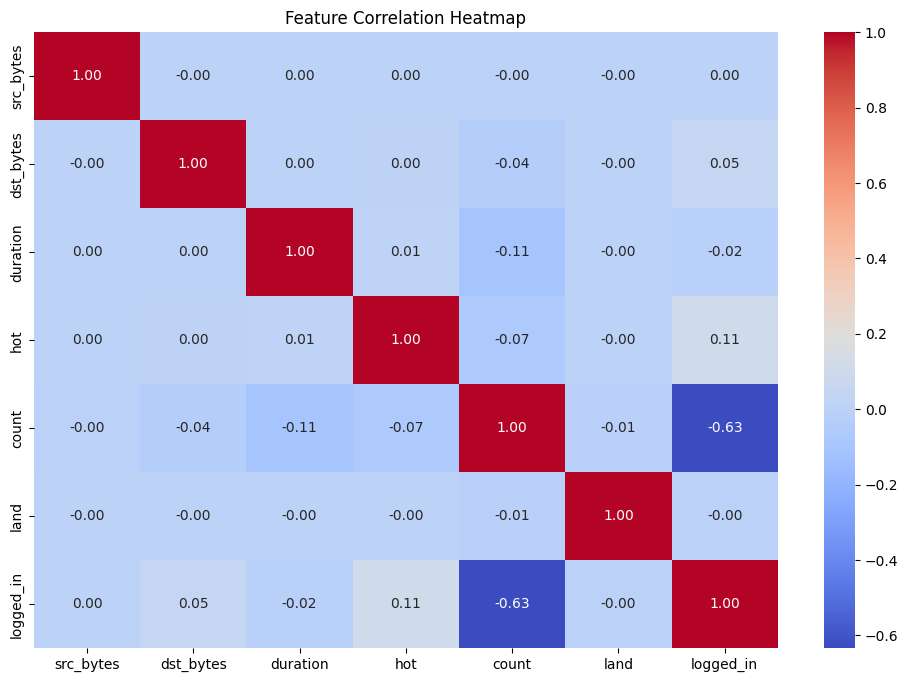

In [25]:
# HEAT MAP

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [5]:
# ACCURACY, PRECISION, RECALL VALUES FOR EACH MODEL

import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from joblib import Parallel, delayed

print("This process may take a few minutes, depending on the performance of your computer.\n\n\n")

# Function to train, test, evaluate a model, and print confusion matrix
def evaluate_model(model, X_train, X_test, y_train, y_test, label):
    start_time = time.time()  # Record start time
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    end_time = time.time()  # Record end time

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    duration = end_time - start_time  # Calculate duration of model fitting

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print confusion matrix
    print(f"\nConfusion Matrix for model {model.__class__.__name__} on label {label}:\n{cm}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model.__class__.__name__} - {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return accuracy, precision, recall, f1, duration

# Define the models to be evaluated
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),  # Adjusted parameters
    "Logistic Regression": LogisticRegression(max_iter=100, random_state=42)
}

# Load the data
df = pd.read_csv('/content/drive/MyDrive/all_data.csv')

# Use a smaller subset of data for testing (10% of the data)
df_sample = df.sample(frac=0.1, random_state=42)

# Get all columns except the labels (features)
feature_columns = [col for col in df_sample.columns if not col.startswith('label_')]

# Get the label columns
label_columns = [col for col in df_sample.columns if col.startswith('label_')]

# Filter out labels with fewer than 2 samples in any class
label_columns_filtered = []
for label in label_columns:
    value_counts = df_sample[label].value_counts()
    if value_counts.min() >= 2 and df_sample[label].nunique() > 1:
        label_columns_filtered.append(label)

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['File', 'ML algorithm', 'accuracy', 'Precision', 'Recall', 'F1-score', 'Time'])

# Parallel processing for model evaluation
def parallel_evaluate_model(label):
    X = df_sample[feature_columns]  # Features
    y = df_sample[label]  # Labels

    # Stratified split of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    local_results = []
    for name, model in models.items():
        try:
            # Evaluate each model and collect results
            accuracy, precision, recall, f1, duration = evaluate_model(model, X_train, X_test, y_train, y_test, label)
            local_results.append({
                'File': label,
                'ML algorithm': name,
                'accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-score': f1,
                'Time': duration
            })
        except ValueError as e:
            print(f"Skipping {name} for {label} due to error: {e}")

    return local_results

# Run the evaluations in parallel
results_list = Parallel(n_jobs=-1)(
    delayed(parallel_evaluate_model)(label) for label in label_columns_filtered
)

# Flatten the list of results and create a DataFrame
results = pd.DataFrame([item for sublist in results_list for item in sublist])

# Display the results
print(results)

print("Process completed.")


This process may take a few minutes, depending on the performance of your computer.



                   File         ML algorithm  accuracy  Precision    Recall  \
0           label_back.          Naive Bayes  0.999865   0.999932  0.984848   
1           label_back.        Random Forest  0.999865   0.999932  0.984848   
2           label_back.  Logistic Regression  0.998988   0.981378  0.901447   
3   label_guess_passwd.          Naive Bayes  1.000000   1.000000  1.000000   
4   label_guess_passwd.        Random Forest  0.999933   0.499966  0.500000   
5   label_guess_passwd.  Logistic Regression  0.999933   0.499966  0.500000   
6           label_imap.          Naive Bayes  0.999933   0.499966  0.500000   
7           label_imap.        Random Forest  0.999933   0.499966  0.500000   
8           label_imap.  Logistic Regression  0.999933   0.499966  0.500000   
9        label_ipsweep.          Naive Bayes  0.988192   0.593023  0.994080   
10       label_ipsweep.        Random Forest

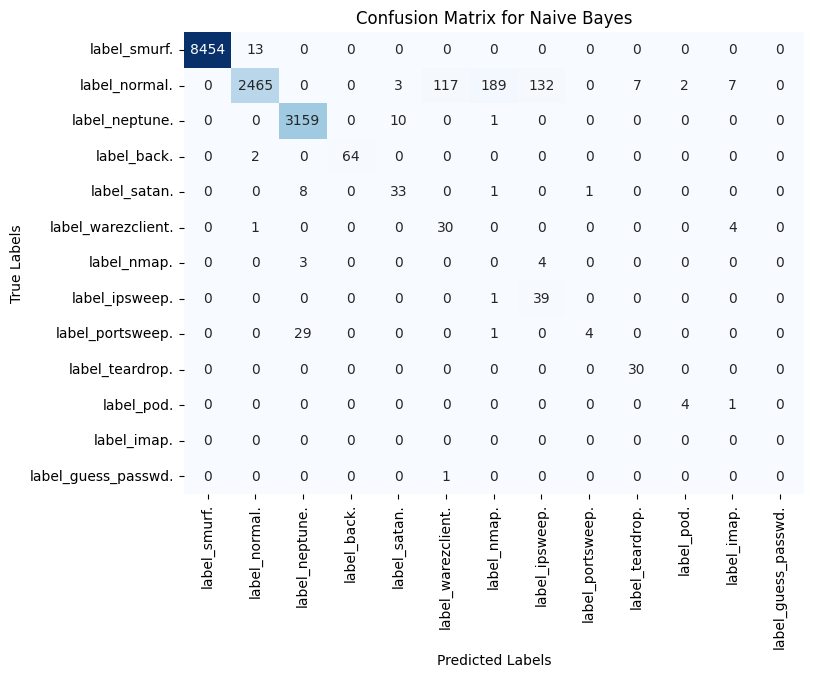

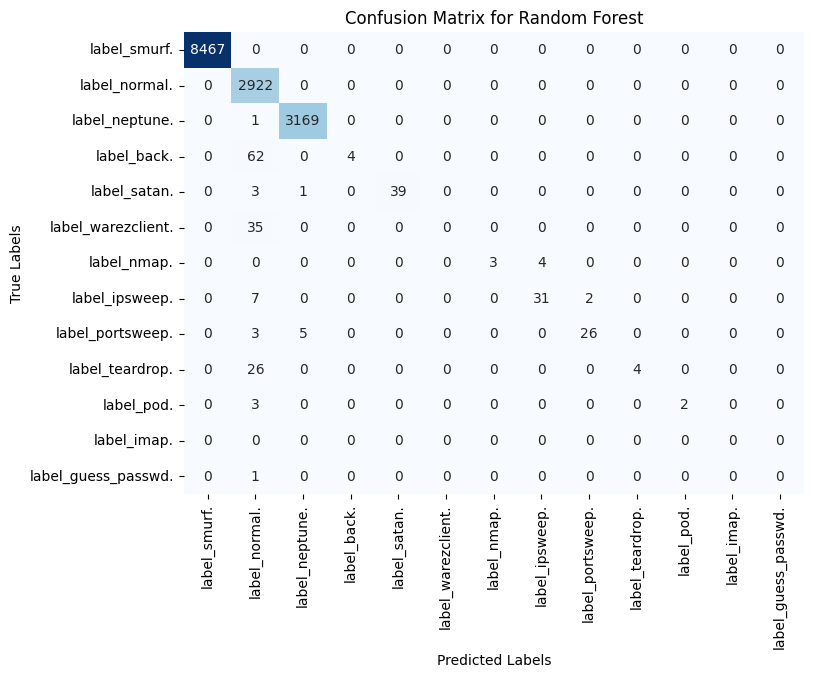

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


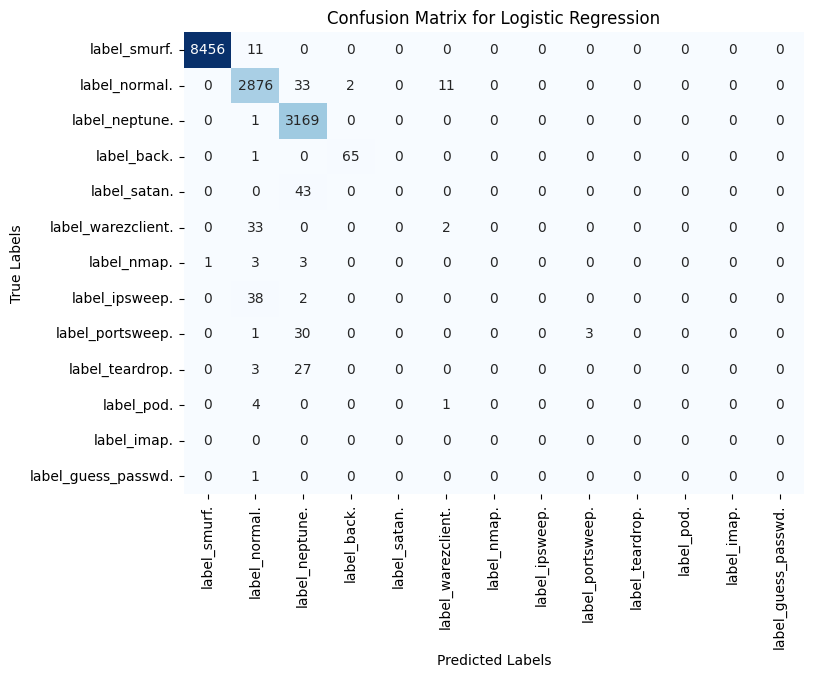

In [11]:
# CONFUSION MATRICES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/all_data.csv')

# Use a smaller subset of data for testing (10% of the data)
df_sample = df.sample(frac=0.1, random_state=42)

# Get all columns except the labels (features)
feature_columns = [col for col in df_sample.columns if not col.startswith('label_')]

# Get the label columns
label_columns = [col for col in df_sample.columns if col.startswith('label_')]

# Combine all label columns into a single column with attack types or normal
def combine_labels(row):
    for label in label_columns:
        if row[label] == 1:
            return label
    return 'normal'

df_sample['combined_label'] = df_sample.apply(combine_labels, axis=1)

# Remove classes with fewer than a certain number of samples
min_samples_per_class = 2
class_counts = df_sample['combined_label'].value_counts()
classes_to_keep = class_counts[class_counts >= min_samples_per_class].index
df_sample = df_sample[df_sample['combined_label'].isin(classes_to_keep)]

# Define the models to be evaluated
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=100, random_state=42)
}

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Get the unique labels for the confusion matrix
unique_labels = df_sample['combined_label'].unique()

# Iterate through each model
for model_name, model in models.items():
    # Prepare confusion matrix
    combined_cm = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)

    # Prepare features and labels
    X = df_sample[feature_columns]
    y = df_sample['combined_label']

    # Stratified split of the data
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    except ValueError as e:
        print(f"Error during train-test split: {e}")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=unique_labels)

    # Plot confusion matrix
    plot_confusion_matrix(cm, model_name, unique_labels)


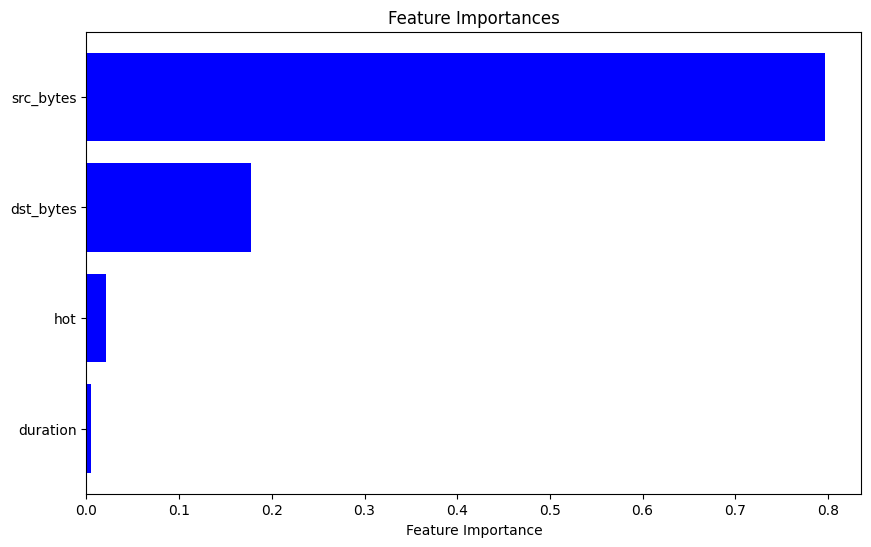

In [27]:
# FEATURE IMPORTANCE GRAPH

importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.savefig('./attacks/feature_importances.pdf')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Define your feature columns and labels
features = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
            'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
            'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
            'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
            'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
            'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
            'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
            'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp']

labels = ['label_back.', 'label_buffer_overflow.', 'label_ftp_write.', 'label_guess_passwd.',
          'label_imap.', 'label_ipsweep.', 'label_land.', 'label_loadmodule.', 'label_multihop.',
          'label_neptune.', 'label_nmap.', 'label_normal.', 'label_perl.', 'label_phf.',
          'label_pod.', 'label_portsweep.', 'label_rootkit.', 'label_satan.', 'label_smurf.',
          'label_spy.', 'label_teardrop.', 'label_warezclient.', 'label_warezmaster.']

# Assuming data is already loaded in a DataFrame called 'data'
X = data[features]
y = data[labels].idxmax(axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis()
}

# Initialize plot
plt.figure(figsize=(12, 8))

# Colors for different models
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

# Loop through models and plot ROC curves
for (name, model), color in zip(models.items(), colors):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=y.unique()[1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for All Models')
plt.legend(loc="lower right")
plt.show()

# To display a bar plot of Accuracy, Precision, and Recall
metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': [accuracy_score(y_test, model.predict(X_test)) for model in models.values()],
    'Precision': [precision_score(y_test, model.predict(X_test), average='weighted') for model in models.values()],
    'Recall': [recall_score(y_test, model.predict(X_test), average='weighted') for model in models.values()]
})

metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()
